<a href="https://colab.research.google.com/github/PeterBo-Phd/PeterBo-Phd/blob/main/Autoencoder_application_based_on_MNIST_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
#Library
from keras.layers import Input, Dense
from keras.models import Model

In [24]:
# 這是我們要進行編碼表示(representation)的大小
encoding_dim = 32 # 32 浮點數 -> 假如我們的輸入是784個浮點數, 那麼壓縮係數為: 784/32 = 24.5

# 這是我們的輸入的佔位符(place holder)
input_img_fc = Input(shape=(784,))

# "encoded"是輸入編碼過後的表示(representation)
encoded_fc = Dense(encoding_dim, activation='relu')(input_img_fc)

# "decoded"是有損失的解碼結果
decoded_fc = Dense(784, activation='sigmoid')(encoded_fc)

# 串接編碼(encoded)與解碼(decoded)的模型
autoencoder_fc = Model(input_img_fc, decoded_fc)

In [3]:
# 這個模型串接輸入到編碼表示(representation)
encoder_fc = Model(input_img_fc, encoded_fc)

In [4]:
# 產生一個佔位符來做為"編碼表示(32-dimensional)"的輸入
encoded_input_fc = Input(shape=(encoding_dim,))

# 取得autoencoder模型最後一層的神經層
decoder_layer_fc = autoencoder_fc.layers[-1]

# 產生解碼模型
decoder_fc = Model(encoded_input_fc, decoder_layer_fc(encoded_input_fc))


In [5]:
# 模型參數設定
autoencoder_fc.compile(optimizer='adadelta', loss='binary_crossentropy')

# 模型結構
autoencoder_fc.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 32)                25120     
_________________________________________________________________
dense_1 (Dense)              (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [6]:
#导入MNIST数据集
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()


11493376/11490434 [==============================] - 0s 0us/step


In [7]:
#我們將歸一化(normalize)所有像素值落於0和1之間，我們將把28x28的圖像打平變成784的向量。
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [8]:
#現在讓我們訓練我們的自動編碼器50個循環(epochs)：
autoencoder_fc.fit(x_train, x_train,
               epochs=50,
               batch_size=256,
               shuffle=True,
               validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 4s 5ms/step - loss: 0.6933 - val_loss: 0.6933
Epoch 2/50
235/235 [==============================] - 1s 3ms/step - loss: 0.6931 - val_loss: 0.6931
Epoch 3/50
235/235 [==============================] - 1s 3ms/step - loss: 0.6929 - val_loss: 0.6929
Epoch 4/50
235/235 [==============================] - 1s 3ms/step - loss: 0.6928 - val_loss: 0.6927
Epoch 5/50
235/235 [==============================] - 1s 3ms/step - loss: 0.6926 - val_loss: 0.6925
Epoch 6/50
235/235 [==============================] - 1s 3ms/step - loss: 0.6924 - val_loss: 0.6923
Epoch 7/50
235/235 [==============================] - 1s 3ms/step - loss: 0.6922 - val_loss: 0.6921
Epoch 8/50
235/235 [==============================] - 1s 3ms/step - loss: 0.6920 - val_loss: 0.6919
Epoch 9/50
235/235 [==============================] - 1s 3ms/step - loss: 0.6918 - val_loss: 0.6917
Epoch 10/50
235/235 [==============================] - 1s 3ms/step - loss: 0.6916 - val_loss: 0.6915

In [10]:
# 編碼與解碼一些手寫數字圖像
encoded_imgs_fc = encoder_fc.predict(x_test)
decoded_imgs_fc = decoder_fc.predict(encoded_imgs_fc)

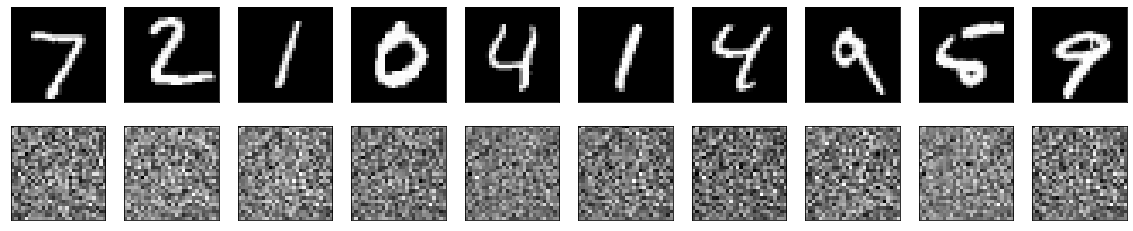

In [11]:
#在50個訓練循環之後，自動編碼器似乎達到穩定的訓練/測試損失值約0.11。我們可以視覺化輸入的重建和編碼表示。我們將使用Matplotlib.
import matplotlib.pyplot as plt

n = 10 # 我們想展示圖像的數量
plt.figure(figsize=(20, 4))

for i in range(n):
    # 原圖像
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # 重建圖像
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_imgs_fc[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

## ***Deep autoencoder***

In [12]:
input_img_deep = Input(shape=(784,))

encoded_deep = Dense(128, activation='relu')(input_img_deep)
encoded_deep = Dense(64, activation='relu')(encoded_deep)
encoded_deep = Dense(32, activation='relu')(encoded_deep)

decoded_deep = Dense(64, activation='relu')(encoded_deep)
decoded_deep = Dense(128, activation='relu')(decoded_deep)
decoded_deep = Dense(784, activation='sigmoid')(decoded_deep)

# 串接編碼(encoded)與解碼(decoded)的模型
autoencoder_deep = Model(input_img_deep, decoded_deep)

# 模型參數設定
autoencoder_deep.compile(optimizer='adadelta', loss='binary_crossentropy')

# 開始訓練模型
autoencoder_deep.fit(x_train, x_train,
               epochs=100,
               batch_size=256,
               shuffle=True,
               validation_data=(x_test, x_test))

Epoch 1/100
235/235 [==============================] - 1s 4ms/step - loss: 0.6934 - val_loss: 0.6934
Epoch 2/100
235/235 [==============================] - 1s 3ms/step - loss: 0.6933 - val_loss: 0.6933
Epoch 3/100
235/235 [==============================] - 1s 3ms/step - loss: 0.6933 - val_loss: 0.6932
Epoch 4/100
235/235 [==============================] - 1s 4ms/step - loss: 0.6932 - val_loss: 0.6932
Epoch 5/100
235/235 [==============================] - 1s 4ms/step - loss: 0.6931 - val_loss: 0.6931
Epoch 6/100
235/235 [==============================] - 1s 4ms/step - loss: 0.6931 - val_loss: 0.6930
Epoch 7/100
235/235 [==============================] - 1s 4ms/step - loss: 0.6930 - val_loss: 0.6929
Epoch 8/100
235/235 [==============================] - 1s 4ms/step - loss: 0.6929 - val_loss: 0.6929
Epoch 9/100
235/235 [==============================] - 1s 3ms/step - loss: 0.6928 - val_loss: 0.6928
Epoch 10/100
235/235 [==============================] - 1s 4ms/step - loss: 0.6928 - val_lo

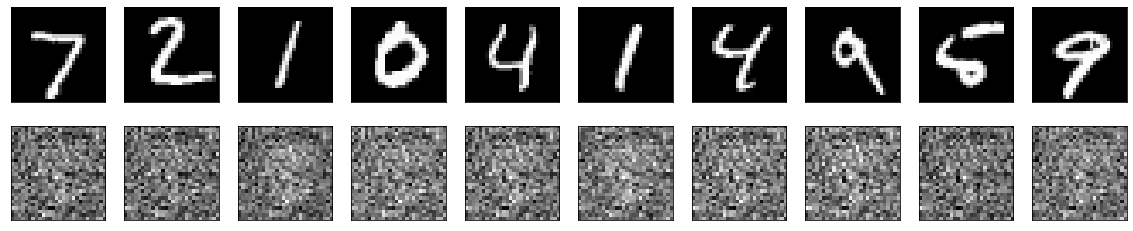

In [13]:
# 編碼與解碼一些手寫數字圖像
decoded_imgs_deep = autoencoder_deep.predict(x_test)

n = 10 # Number of images 
plt.figure(figsize=(20, 4))

for i in range(n):
    # Original image
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # New image
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_imgs_deep[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

# **Convolutional autoencoder**

In [15]:
from keras.layers import Input, Dense, Conv2D, MaxPool2D, UpSampling2D
from keras.models import Model

input_img_cov = Input(shape=(28, 28, 1)) # 使用`channels_first`圖像數據格式

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img_cov)
x = MaxPool2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPool2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded_cov = MaxPool2D((2, 2), padding='same')(x)

# 到這個節點的編碼表示的結構是 (4, 4, 8), 也可以想成是 128-dimensional

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded_cov)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded_cov = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

# 串接編碼(encoded)與解碼(decoded)的模型
autoencoder_cov = Model(input_img_cov, decoded_cov)

# 模型參數設定
autoencoder_cov.compile(optimizer='adadelta', loss='binary_crossentropy')

# 秀出模型結構
autoencoder_cov.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 4, 4, 8)           0   

In [16]:
#為了訓練它，我們將使用原始MNIST數字（樣本,28,28），並且我們僅對像素值進行歸一化讓數值落在0和1之間。
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # 使用`channels_first`圖像數據格式
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # 使用`channels_first`圖像數據格式

print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [17]:
# 開始訓練模型
autoencoder_cov.fit(x_train, x_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))


Epoch 1/50
469/469 [==============================] - 33s 7ms/step - loss: 0.6883 - val_loss: 0.6832
Epoch 2/50
469/469 [==============================] - 3s 5ms/step - loss: 0.6807 - val_loss: 0.6710
Epoch 3/50
469/469 [==============================] - 3s 5ms/step - loss: 0.6654 - val_loss: 0.6408
Epoch 4/50
469/469 [==============================] - 3s 6ms/step - loss: 0.6240 - val_loss: 0.5531
Epoch 5/50
469/469 [==============================] - 3s 6ms/step - loss: 0.5285 - val_loss: 0.4944
Epoch 6/50
469/469 [==============================] - 3s 6ms/step - loss: 0.4869 - val_loss: 0.4790
Epoch 7/50
469/469 [==============================] - 3s 6ms/step - loss: 0.4720 - val_loss: 0.4640
Epoch 8/50
469/469 [==============================] - 3s 6ms/step - loss: 0.4572 - val_loss: 0.4483
Epoch 9/50
469/469 [==============================] - 3s 5ms/step - loss: 0.4410 - val_loss: 0.4316
Epoch 10/50
469/469 [==============================] - 3s 6ms/step - loss: 0.4241 - val_loss: 0.413

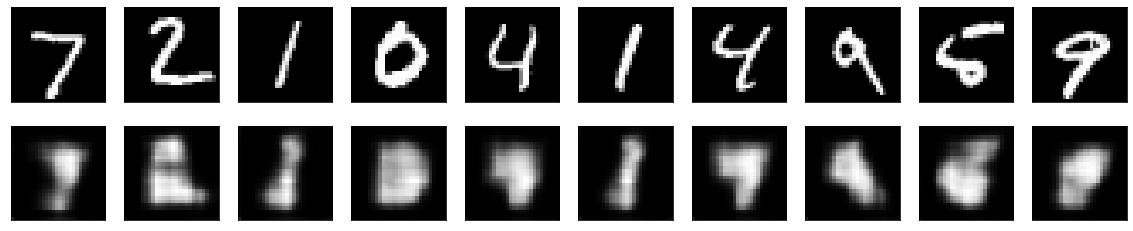

In [18]:
decoded_imgs_conv = autoencoder_cov.predict(x_test)

n = 10 # 我們想展示圖像的數量
plt.figure(figsize=(20, 4))

for i in range(n):
    # 秀出原圖像
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # 秀出重建圖像
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_imgs_conv[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

# **Image denoising**

In [19]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # 使用`channels_first`圖像數據格式
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # 使用`channels_first`圖像數據格式

noise_factor = 0.5 # 噪點因子
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

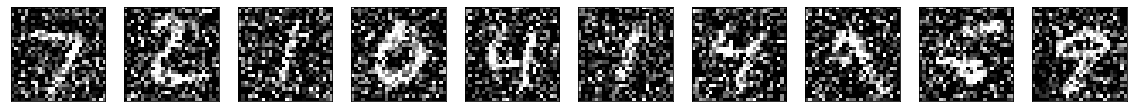

In [20]:
#以下是有噪點的數字圖像：
n = 10
plt.figure(figsize=(20, 2))

for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [21]:
input_img_conv2 = Input(shape=(28, 28, 1))

x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img_conv2)
x = MaxPool2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded_conv2 = MaxPool2D((2, 2), padding='same')(x)

# 到這個節點的編碼表示的結構是 (7, 7, 32)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded_conv2)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded_conv2= Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

# 串接編碼(encoded)與解碼(decoded)的模型
autoencoder_conv2 = Model(input_img_conv2, decoded_conv2)

# 模型參數設定
autoencoder_conv2.compile(optimizer='adadelta', loss='binary_crossentropy')

# 模型參數設定
autoencoder_conv2.summary()

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 7, 7, 32)          9248      
_________________________________________________________________
up_sampling2d_6 (UpSampling2 (None, 14, 14, 32)        0   

In [22]:
#训练100个循环
autoencoder_conv2.fit(x_train_noisy, x_train,
                     epochs=100,
                     batch_size=128,
                     shuffle=True,
                     validation_data=(x_test_noisy, x_test))

Epoch 1/100
469/469 [==============================] - 4s 8ms/step - loss: 0.6820 - val_loss: 0.6599
Epoch 2/100
469/469 [==============================] - 3s 7ms/step - loss: 0.6496 - val_loss: 0.6084
Epoch 3/100
469/469 [==============================] - 3s 7ms/step - loss: 0.5876 - val_loss: 0.5344
Epoch 4/100
469/469 [==============================] - 3s 7ms/step - loss: 0.5224 - val_loss: 0.5103
Epoch 5/100
469/469 [==============================] - 3s 7ms/step - loss: 0.5047 - val_loss: 0.5018
Epoch 6/100
469/469 [==============================] - 3s 7ms/step - loss: 0.4968 - val_loss: 0.4938
Epoch 7/100
469/469 [==============================] - 3s 7ms/step - loss: 0.4876 - val_loss: 0.4860
Epoch 8/100
469/469 [==============================] - 3s 7ms/step - loss: 0.4811 - val_loss: 0.4778
Epoch 9/100
469/469 [==============================] - 3s 7ms/step - loss: 0.4727 - val_loss: 0.4681
Epoch 10/100
469/469 [==============================] - 3s 7ms/step - loss: 0.4620 - val_lo

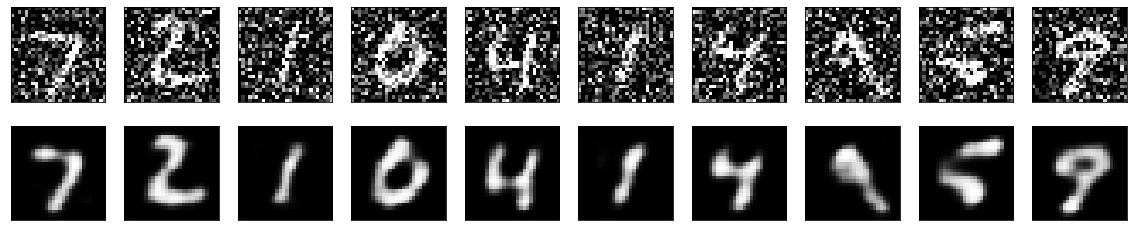

In [25]:
decoded_imgs_conv2 = autoencoder_conv2.predict(x_test_noisy)

n = 10 # 我們想展示圖像的數量
plt.figure(figsize=(20, 4))

for i in range(n):
    # Show original image
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # Show rebuilt image
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_imgs_conv2[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

In [27]:
!/opt/bin/nvidia-smi

Wed Apr  7 14:34:09 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   73C    P0    33W /  70W |   1088MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
#現在我們來看看結果。第一行展現的是有噪點的數字圖像，以及第二行由網絡重建的數字圖像。 它似乎效果很好。如果您將此過程擴展為更大的卷積網絡，那麼就可以開始構建文檔去噪或音頻去噪的模型。